# 0. Pandas introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import ggplot, aes
import plotnine as pn

Why should we use Pandas instad of just opening our table in Excel? While Excel is practical to browse through data, it is very cumbersome to use it to combine, re-arrange and thoroughly analyze data: code is hidden and difficult to share, there's no version control, it's difficult to automate tasks, the manual clicking around leads to mistakes etc.

In this course you will learn how to handle tabular data with Pandas, a Python package widely used in the scientific and data science areas. You will learn how to create and import tables, how to combine them, modify them, do statistical analysis on them and finally how to use them to easily create complex visualisations.

So that you see where this leads, we start with a short example of how Pandas can be used in a project. We look here at tables provided by the Federal Office of Statistics about all Swiss towns every year (population, number of vacant houses, unemployement etc.)

## 0.1 From import to plot in 3 lines

- Import: In a first step we import the spread sheet:

In [2]:
towns = pd.read_excel('../Datasets/2013.xls', skiprows=list(range(5))+list(range(6,9)), skipfooter=34, index_col='Commune',na_values=['*'])

- Then we can look at it:

In [3]:
towns.head()

,Code commune,Habitants,Densité de la population par km²,Variation en %,Par mouvement migratoire,Par excédent naturel,Etrangers en %,0-19 ans,20-64 ans,>64 ans,...,PDC,PSS,UDC,PBD,PEV/PCS,PVL,PST/Sol.,PES,Petits partis de droite,Autres
Commune,,,,,,,,,,,,,,,,,,,,,
Aeugst am Albis,1,1910,241,4.7,4.4,0.1,13.6,21.6,63.2,15.1,...,3.3,15.2,28.7,6.8,4.2,10.7,0.0,9.7,4.9,2.5
Affoltern am Albis,2,11160,1052,0.6,0.0,0.4,26.0,21.4,63.0,15.5,...,5.7,16.5,31.9,6.6,4.5,10.3,0.1,8.4,2.3,2.9
Bonstetten,3,5173,696,0.3,-1.0,0.9,12.7,23.9,63.5,12.6,...,3.7,18.2,27.1,5.7,3.3,17.0,0.1,7.5,1.6,3.1
Hausen am Albis,4,3356,246,-0.1,-0.4,0.3,12.4,23.8,61.3,14.9,...,3.3,15.6,33.5,6.7,2.2,14.2,0.0,11.4,1.7,1.7
Hedingen,5,3469,531,1.7,0.9,0.6,14.0,24.0,63.0,13.0,...,3.7,20.5,31.4,4.0,4.1,14.3,0.2,9.1,2.2,2.3


- And in one line do a rather complex plot where cities are split into size groups and their average vote calcualted:

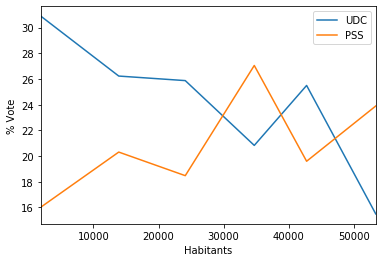

In [4]:
ax = towns.groupby(pd.cut(towns['Habitants'], np.arange(0, 100000, 10000)),as_index=False).mean().dropna().plot(x = 'Habitants', y = ['UDC','PSS'])
ax.set_ylabel('% Vote')
plt.show()

## 0.2 Combining data and assemble complex plot

Above we imported a single table. However often you need to combine information from multiple sources or multiple experiments. This can be extremely tedious to do in Excel. Here it is done in a few lines:
- import all tables in a loop

In [5]:
towns = []
for x in range(2013, 2020):
    temp_town = pd.read_excel('../Datasets/'+str(x)+'.xls', skiprows=list(range(5))+list(range(6,9)), skipfooter=34, index_col='Commune',na_values=['*','+'])
    temp_town['year'] = x
    towns.append(temp_town)

- assemble the tables (concatenation)

In [6]:
towns_concat = pd.concat(towns,sort=False)

- Make a list of cities you are interested in and select only those:

In [7]:
cities = ['Zürich', 'Bern','Lausanne','Basel','Genève']

Plot for each city a parameter you are interested in like the fraction of vacant appartments:

In [8]:
import seaborn as sns

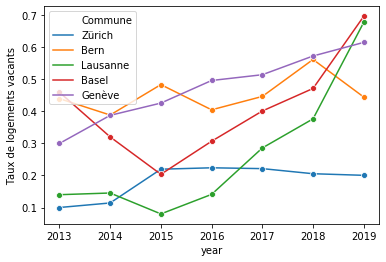

In [22]:
g = sns.lineplot(data = towns_concat.loc[cities].reset_index(), x = 'year', y = 'Taux de logements vacants',
            hue = 'Commune', marker = "o", dashes=False);
plt.legend(loc='upper left')
plt.show()

We can also exploit the plotting capabilities of advanced packages such as plotnine, a Python version of ggplot, to create complex plots with little effort. For example here, we show how the voting depends on how much a town depends on agriculture. We separate the data by year as well as py party.

First we just import two years of data (two different parliaments):

In [24]:
towns = []
for x in [2014, 2019]:
    temp_town = pd.read_excel('../Datasets/'+str(x)+'.xls', skiprows=list(range(5))+list(range(6,9)), skipfooter=34, index_col='Commune',na_values=['*','+'])
    temp_town['year'] = x
    towns.append(temp_town)
towns_concat = pd.concat(towns,sort=False)

We recover the necessary information and do some data reshaping (tidying) to be able to easily realize the plot:

In [25]:
towns_parties = towns_concat.reset_index()[['year','UDC','PS','Commune','Surface agricole en %']]

#wide to long
towns_parties = pd.melt(towns_parties, id_vars=['Commune','Surface agricole en %','year'],
                        value_vars=["UDC", "PS"], value_name='Vote fraction', var_name='Party')

In [26]:
towns_parties.head()

,Commune,Surface agricole en %,year,Party,Vote fraction
0,Aeugst am Albis,51.334180,2014,UDC,28.652058
1,Affoltern am Albis,40.094340,2014,UDC,31.894371
2,Bonstetten,55.436242,2014,UDC,27.095457
3,Hausen am Albis,55.774854,2014,UDC,33.535200
4,Hedingen,46.248086,2014,UDC,31.438683


And finally we can plot our data:

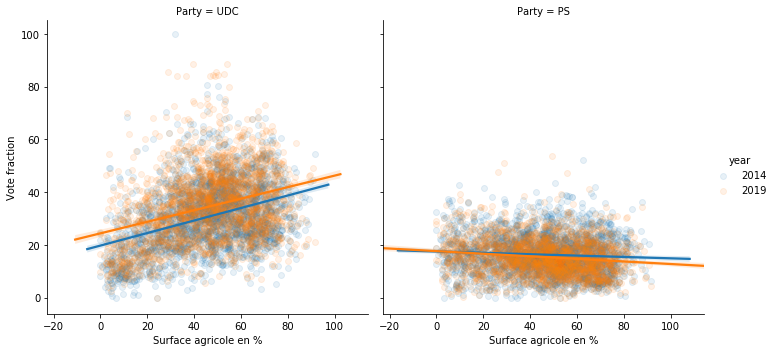

In [34]:
sns.lmplot(data = towns_parties.dropna(), x = 'Surface agricole en %',
          y = 'Vote fraction', hue = 'year',col = 'Party',
           scatter_kws={'alpha' :0.1})

/Users/gw18g940/miniconda3/envs/pandas_course/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


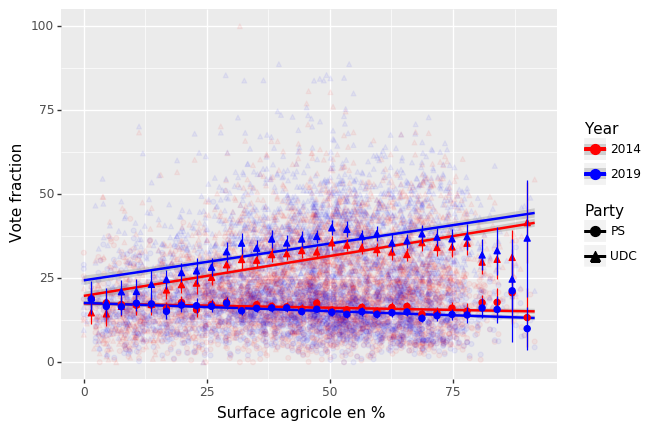

In [35]:
(ggplot(towns_parties.dropna(),aes(x = 'Surface agricole en %', y = 'Vote fraction', color = 'factor(year)', shape = 'Party'))
 + pn.geom_point(alpha = 0.05)
 + pn.geom_smooth(method='lm')
 + pn.stats.stat_summary_bin(fun_data = 'mean_cl_normal', bins = 30)#fun_y = np.mean, fun_ymin=np.var, fun_ymax=np.var, bins = 30)
 + pn.labs(color = 'Year')
 + pn.scale_color_manual(['red','blue'])
).draw();